<h1><center>RGPD</center></h1>
<h2><center>Analyse et diagnostic de l'égalité hommes femmes au sein d'une entreprise</center></h2>


### Contexte du projet: 
Vous êtes un consultatnt data dans un cabinet spécialisé dans la transformationdigitaledes entreprises. Le cabinet compte déjà plus de 150 salariés et est en plein développement. Dans ce contexte économique, le recrutement de consultants expérimentés devient un véritable enjeu stratégique. 
On fait appel à vous pour aider à **automatiser la création d’un rapport de diagnostique sur l’égalité professionnelle femmes hommes dans l’entreprise afin d’améliorer notre marque employeur et d’attirer plus facilement des talents.** 

### Objectifs : 
* Consulter Le site du ministère du Travail qui donne de nombreuses informations pour établir un diagnostic.

* Regarder aussi le document de présentation de l’outil Diagnostic Egalité (cf dossier infos brief) dans lequel vous trouverez aussi une liste des indicateurs à surveiller. Pas besoin de tous les extraire, mais dans un premier temps choisir-en au minimum 5 dans la liste que votre workflow devra générer.

**/!\ Attention ,les données issues du SIRH ne sont pas anonymisées, alors il faudralestraiterpour que le rapport respecte le RGPD.**

### Livrables attendus: 
1. Fichier .csv avec les données préparées. 
2. Présentation ppt avec les choix des axes, les transformations appliquées pour respecter le RGPD

#### Bibliographie :

1 - https://travail-emploi.gouv.fr/IMG/pdf/guide_egalite_tpe_pme_2021.pdf

2 - https://www.cnil.fr/cnil-direct/question/quels-sont-les-grands-principes-des-regles-de-protection-des-donnees?visiteur=part


## Librairies et fonctions utiles

In [1]:
## basic libraries for data analysis
import pandas as pd, numpy as np
from datetime import date
import os

## Librairies for data viz
import matplotlib.pyplot as plt
import seaborn as sns

## in case of warnings to not plot with resultst
import warnings
warnings.filterwarnings("ignore")

## Define the palette of colors we want to use
%matplotlib inline
plt.style.use('seaborn-warm-palette')
palette = sns.color_palette("Set2")


## requirements as librairies
    ## openpyxl to read excel

    
## librairies needed
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

def generate_df(df,x,y):
    t = pd.DataFrame(df.groupby(x)[y].value_counts())
    t.columns=["nombre_de_personnes"]
    t.reset_index(inplace=True)
    return t


def generate_df_mean(df,x,y):
    t = pd.DataFrame(df_final.groupby(x)[y].mean())
    t.columns=[y+" moyenne"]
    t.reset_index(inplace=True)
    return t

## Export Data

In [5]:
## on liste les tables qu'on a à disposition
os.listdir('datasets')

['infos_pro.xlsx', 'remuneration.xlsx', 'salaires.xlsx']

In [7]:
for c in os.listdir('datasets'):
    locals()[c.split(".")[0]] = pd.read_excel('datasets/'+c)

locals()["infos_pro"]

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction
0,16000206-8278,12.6,59,Marketing,Non,67
1,16011205-0331,11.8,31,Commercial,Oui,66
2,16020327-1465,11.9,65,RH,Non,59
3,16020701-3376,10.2,59,Compta Finances,Non,60
4,16020725-8401,7.9,59,Consultant,Non,34
...,...,...,...,...,...,...
251,16960906-7989,3.3,15,R&D,Oui,81
252,16970415-1050,21.7,59,Consultant,Non,98
253,16981206-3817,13.0,68,RH,Oui,62
254,16990414-3527,10.8,32,Consultant,Non,39


In [9]:
df_names = [c.split(".")[0] for c in os.listdir('datasets')]
print("INFORMATIONS ABOUT OUR DATAFRAMES")
for c in df_names:
    print("****************")
    print(c)
    print(locals()[c].shape)
    print(locals()[c].columns)
    print(" ")

INFORMATIONS ABOUT OUR DATAFRAMES
****************
infos_pro
(256, 6)
Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction'],
      dtype='object')
 
****************
remuneration
(256, 7)
Index(['id_salarié', 'Contrat', 'Durée hebdo', 'Salaire base mensuel',
       '%variable_moyen', 'Augmentation', 'Promotion'],
      dtype='object')
 
****************
salaires
(256, 7)
Index(['id_salarié', 'Sexe', 'Prénom/Nom', 'Telephone', 'Date_naissance',
       'Etat Civil', 'Enfants'],
      dtype='object')
 


On remarque que les 3 tables récapitulent les informations sur 256 salariés : personnelles et professionnelles.

Nous allons donc analyser de plus près table par table et voir les actions à mener pour nettoyer la donnée et la rendre rgpd conforme 

## Analyse

### Table - informations professionnelles

In [16]:
infos_pro.describe(include='all')

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction
count,256,256.000000,256.000000,256,256,256.000000
unique,256,NaN,NaN,6,2,NaN
top,16000206-8278,NaN,NaN,Consultant,Oui,NaN
freq,1,NaN,NaN,69,129,NaN
mean,NaN,13.160938,38.433594,NaN,NaN,50.687500
std,NaN,7.020684,19.834301,NaN,NaN,27.837413
min,NaN,0.300000,3.000000,NaN,NaN,1.000000
25%,NaN,7.375000,22.000000,NaN,NaN,30.000000
50%,NaN,12.750000,40.500000,NaN,NaN,50.500000
75%,NaN,19.300000,57.000000,NaN,NaN,73.000000


In [14]:
infos_pro.isna().sum()
    ## Pas de missing values

id_salarié                   0
Ancienneté_an                0
Distance domicile/Travail    0
Service                      0
Work_accident                0
Niveau de satisfaction       0
dtype: int64

In [15]:
infos_pro.head(5)

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction
0,16000206-8278,12.6,59,Marketing,Non,67
1,16011205-0331,11.8,31,Commercial,Oui,66
2,16020327-1465,11.9,65,RH,Non,59
3,16020701-3376,10.2,59,Compta Finances,Non,60
4,16020725-8401,7.9,59,Consultant,Non,34


In [17]:
infos_pro.Service.unique()

array(['Marketing', 'Commercial', 'RH', 'Compta Finances', 'Consultant',
       'R&D'], dtype=object)

In [48]:
infos_pro.Work_accident.value_counts()

Oui    129
Non    127
Name: Work_accident, dtype: int64

### Table - rémunération

La table récapitule les informations sur le type de contrat de chaque employé, avec le nombre d'heures à faire par semaine, le salaire et les informations complémentaires sur le variable, augmentation & promotion

In [20]:
remuneration.head(5)

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35.0,9873.5000,13.0,0.0,0.0
1,16990414-3527,CDI,35.0,4296.7167,39.0,0.0,1.0
2,16981206-3817,CDI,35.0,3705.2167,29.0,1.0,1.0
3,16970415-1050,CDI,35.0,1697.1500,17.0,1.0,0.0
4,16960906-7989,CDD,35.0,2848.3000,15.0,1.0,0.0


In [21]:
remuneration.describe(include='all')

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
count,256,256,256.000000,256.000000,256.000000,241.000000,241.000000
unique,256,2,NaN,NaN,NaN,NaN,NaN
top,16990924-2829,CDI,NaN,NaN,NaN,NaN,NaN
freq,1,240,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,33.871094,5326.530626,20.027344,0.518672,0.518672
std,NaN,NaN,3.203397,2505.493530,11.529809,0.500691,0.500691
min,NaN,NaN,24.000000,1059.760000,0.000000,0.000000,0.000000
25%,NaN,NaN,35.000000,3111.918325,10.000000,0.000000,0.000000
50%,NaN,NaN,35.000000,5084.625000,19.000000,1.000000,1.000000
75%,NaN,NaN,35.000000,7407.020850,30.000000,1.000000,1.000000


In [22]:
remuneration.isna().sum()
    ## quelques missing values 15/256

id_salarié               0
Contrat                  0
Durée hebdo              0
Salaire base mensuel     0
%variable_moyen          0
Augmentation            15
Promotion               15
dtype: int64

In [23]:
remuneration["Durée hebdo"].unique()

array([35., 24., 32., 28.])

In [24]:
remuneration.groupby("Contrat")["Durée hebdo"].unique()

Contrat
CDD                [35.0, 32.0]
CDI    [35.0, 24.0, 28.0, 32.0]
Name: Durée hebdo, dtype: object

### Table - Salaires

Cette table "Salarié" récapitule les informations personnelles et sensible sur le client.

In [26]:
salaires.head(5)

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599,1955-07-07,Célibataire,1
1,16661123-8764,H,Nicolas Jaccoud,660029842,1970-09-22,Célibataire,3
2,16230718-4297,F,Alexandra Auguste,629910592,1965-03-01,Marié,1
3,16130305-6954,F,Marie-Claire Besnard,685888970,1963-09-02,NaN,1
4,16360125-5924,F,Marie Berengar,624840475,1959-04-02,Marié,3


In [8]:
salaires.describe(include='all')

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
count,256,256,256,2.560000e+02,256,174,256.000000
unique,256,2,256,NaN,252,2,NaN
top,16211102-1297,H,Norbert Reverdin,NaN,1963-10-25 00:00:00,Marié,NaN
freq,1,131,1,NaN,2,92,NaN
first,NaN,NaN,NaN,NaN,1954-12-07 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,1991-01-30 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,6.511928e+08,NaN,NaN,1.460938
std,NaN,NaN,NaN,2.915357e+07,NaN,NaN,1.123038
min,NaN,NaN,NaN,6.003126e+08,NaN,NaN,0.000000
25%,NaN,NaN,NaN,6.251080e+08,NaN,NaN,0.000000


In [29]:
salaires.isna().sum()
## missing values pour l'état civil

id_salarié         0
Sexe               0
Prénom/Nom         0
Telephone          0
Date_naissance     0
Etat Civil        82
Enfants            0
dtype: int64

In [31]:
salaires.Sexe.value_counts()

H    131
F    125
Name: Sexe, dtype: int64

In [32]:
salaires.Enfants.value_counts()

1    69
0    66
3    63
2    58
Name: Enfants, dtype: int64

In [45]:
salaires["Etat Civil"].value_counts()

Marié          92
Célibataire    82
Name: Etat Civil, dtype: int64

## Construction de la table finale avec traitements nécessaires

Le but de cette partie est de créer une table commune au 3 analysés et de traiter les données sensibles

In [34]:
df_names

['infos_pro', 'remuneration', 'salaires']

In [35]:
infos_pro.columns

Index(['id_salarié', 'Ancienneté_an', 'Distance domicile/Travail', 'Service',
       'Work_accident', 'Niveau de satisfaction'],
      dtype='object')

#### 1 - On compte les identifiants distincts par table

In [40]:
for c in df_names:
    print("*************")
    print("Nombre d'ids distincts dans la table "+ c + " est : "+ str(len(locals()[c]["id_salarié"].unique())))

*************
Nombre d'ids distincts dans la table infos_pro est : 256
*************
Nombre d'ids distincts dans la table remuneration est : 256
*************
Nombre d'ids distincts dans la table salaires est : 256


#### 2 - Vérification de l'identifiant client
Le but est de vérifier qu'il n'y a pas d'écarts sur l'id des clients sur les 3 tables

In [42]:
## intersection des 3 listes des id clients provenants des 3 tables
len(list(set(infos_pro["id_salarié"]) & set(remuneration["id_salarié"]) & set(salaires["id_salarié"])))

256

On peut conclure que les mêmes identifiants existent bien dans toutes les tables

In [9]:
df_final = pd.merge(salaires, infos_pro, on='id_salarié', how="inner")
df_final = pd.merge(df_final, remuneration, on='id_salarié', how="inner")

df_final.head(5)

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,Ancienneté_an,Distance domicile/Travail,Service,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,16920105-1209,F,Solenne Delannoy,607958599,1955-07-07,Célibataire,1,25.0,58,Consultant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16661123-8764,H,Nicolas Jaccoud,660029842,1970-09-22,Célibataire,3,24.9,62,Commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16230718-4297,F,Alexandra Auguste,629910592,1965-03-01,Marié,1,24.8,44,Compta Finances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16130305-6954,F,Marie-Claire Besnard,685888970,1963-09-02,NaN,1,24.7,30,Consultant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16360125-5924,F,Marie Berengar,624840475,1959-04-02,Marié,3,24.7,53,Commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_final.shape

(256, 18)

In [52]:
df_final.dtypes

id_salarié                           object
Sexe                                 object
Prénom/Nom                           object
Telephone                             int64
Date_naissance               datetime64[ns]
Etat Civil                           object
Enfants                               int64
Ancienneté_an                       float64
Distance domicile/Travail             int64
Service                              object
Work_accident                        object
Niveau de satisfaction                int64
Contrat                              object
Durée hebdo                         float64
Salaire base mensuel                float64
%variable_moyen                     float64
Augmentation                        float64
Promotion                           float64
dtype: object

#### 3 - Anonymisation des données sensibles

Nous remarquons de l'analyse et la table finale que les colonnes contenant des informations sensibles sur les employés sont :
* id_salarié
* Prénom/Nom
* Telephone
* Date_naissance --> elle sera utilisée pour générer l'information âge

Pour respecter les consignes rgpd, nous allons procéder à l'anonymisation de cette table. Pour cela, nous choisissons l'option de supprimer les colonnes citées au-dessus car non seulement elles nous ne permettent pas d'être rgpd conforme mais aussi elles ne vont pas apporter une information utile pour le diagnostic à fournir au client.

In [10]:
df_final["age"] = df_final["Date_naissance"].apply(lambda x:age(x))
df_final.head(5)

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,Ancienneté_an,Distance domicile/Travail,Service,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,age
0,16920105-1209,F,Solenne Delannoy,607958599,1955-07-07,Célibataire,1,25.0,58,Consultant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
1,16661123-8764,H,Nicolas Jaccoud,660029842,1970-09-22,Célibataire,3,24.9,62,Commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
2,16230718-4297,F,Alexandra Auguste,629910592,1965-03-01,Marié,1,24.8,44,Compta Finances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
3,16130305-6954,F,Marie-Claire Besnard,685888970,1963-09-02,NaN,1,24.7,30,Consultant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
4,16360125-5924,F,Marie Berengar,624840475,1959-04-02,Marié,3,24.7,53,Commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63


In [55]:
df_final.columns

Index(['id_salarié', 'Sexe', 'Prénom/Nom', 'Telephone', 'Date_naissance',
       'Etat Civil', 'Enfants', 'Ancienneté_an', 'Distance domicile/Travail',
       'Service', 'Work_accident', 'Niveau de satisfaction', 'Contrat',
       'Durée hebdo', 'Salaire base mensuel', '%variable_moyen',
       'Augmentation', 'Promotion', 'age'],
      dtype='object')

In [11]:
## on supprime les colonnes contenant
cols_sensitive_data = ['id_salarié','Prénom/Nom', 'Telephone', 'Date_naissance']
df_final.drop(cols_sensitive_data,axis=1,inplace=True)

In [57]:
df_final.columns

Index(['Sexe', 'Etat Civil', 'Enfants', 'Ancienneté_an',
       'Distance domicile/Travail', 'Service', 'Work_accident',
       'Niveau de satisfaction', 'Contrat', 'Durée hebdo',
       'Salaire base mensuel', '%variable_moyen', 'Augmentation', 'Promotion',
       'age'],
      dtype='object')

In [69]:
df_final.to_csv("informations_generales_salaries.csv")

In [67]:
df_final.groupby("Sexe")["age"].mean()

Sexe
F    51.472000
H    51.465649
Name: age, dtype: float64

## Rapport diagnostique sur l’égalité professionnelle femmes hommes dans l’entreprise

Nous allons d'abord regarder la répartition des employés de l'entreprise par sexe, ensuite nous allons se focaliser sur les 5 axes suivants :

* Embauche : 
    * Répartition des employés par sexe et catégorie professionnelle (service dans notre cas)
    * Répartition des embauches par typologie des contrats pour femme-homme
    
* Formation : Répartition du nombre moyen d'heures de travail hebdomadaire par sexe

* Promotion : Répartition des employés selon l'anciennté moyenne et le sexe

* Répartition des salaires par tranche age et par sexe 

In [90]:
df_final["Sexe"] = df_final["Sexe"].apply(lambda x:'Femme' if x=="F" else "Homme")

In [98]:
font = {'family': 'serif',
        'weight': 'normal',
        'color' : 'gray',
        'size': 10,
        }

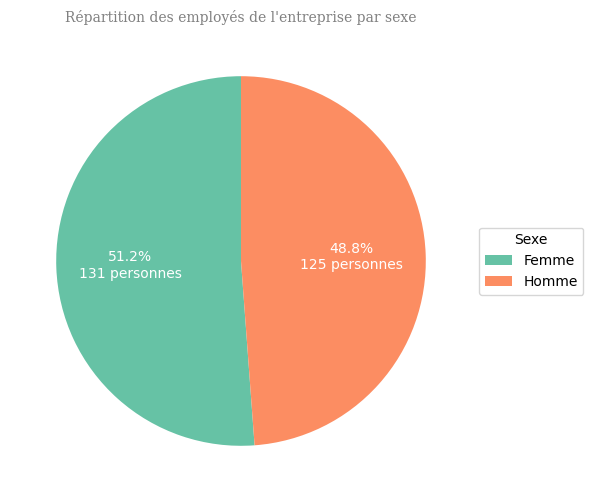

In [102]:
labels = df_final["Sexe"].unique().tolist()
data = df_final["Sexe"].value_counts().values.tolist()

palette = sns.color_palette("Set2")

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d} personnes".format(pct, absolute)


#create pie chart
fig = plt.figure(figsize=(10,6))

wedges, texts, autotexts = plt.pie(data, colors=palette, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), startangle=90)

plt.legend(wedges, labels,
          title="Sexe",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Répartition des employés de l'entreprise par sexe", fontdict=font)
plt.show()

#### indicateur 1 - Répartition des employés par sexe et catégorie professionnelle (service dans notre cas)

In [120]:
## On regarde d'abord les données sur les services par sexe
df_service_per_sexe = generate_df(df_final,"Sexe","Service")
df_service_per_sexe

,Sexe,Service,nombre_de_personnes
0,Femme,Consultant,30
1,Femme,Commercial,29
2,Femme,Compta Finances,24
3,Femme,RH,24
4,Femme,Marketing,15
5,Femme,R&D,3
6,Homme,Consultant,39
7,Homme,Commercial,23
8,Homme,Marketing,21
9,Homme,RH,19


Text(0.5, 1.0, 'Répartition des services par sexe')

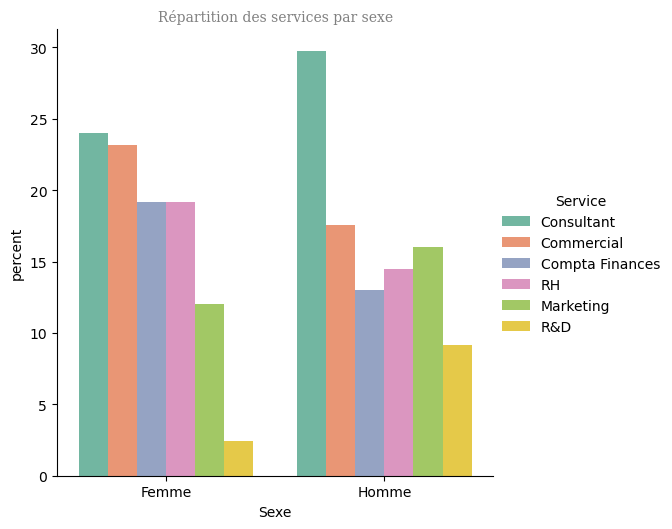

In [115]:
x = 'Sexe'
y = 'Service'

(df_final
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', legend=True, palette=palette))

plt.title('Répartition des services par sexe', fontdict=font)

On remarque que sur les services, l'égalité homme - femme n'est pas très respecté. Nous avons des services où les hommes sont plus présents que les femmes et inversément

#### indicateur 2 - Répartition des embauches par typologie des contrats pour femme-homme

In [121]:
cnt_per_sexe = generate_df(df_final,"Sexe","Contrat")
cnt_per_sexe

,Sexe,Contrat,nombre_de_personnes
0,Femme,CDI,114
1,Femme,CDD,11
2,Homme,CDI,126
3,Homme,CDD,5


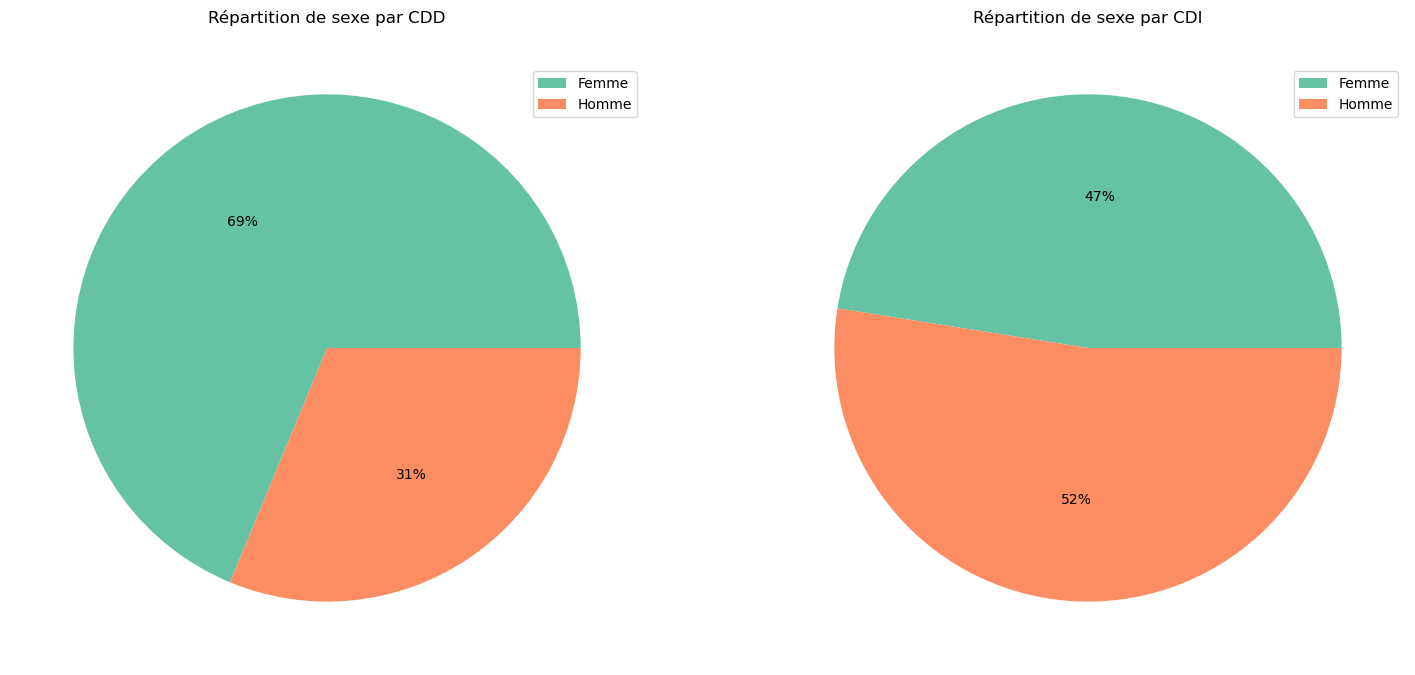

In [158]:
plt.figure(figsize=[18,10])

for i,c in enumerate(["CDD","CDI"]):

    plt.subplot(1, 2, i+1)
    
    tmp=cnt_per_sexe[cnt_per_sexe["Contrat"]==c]
    
    labels = tmp["Sexe"].unique()
    data = tmp["nombre_de_personnes"]
    
    plt.pie(data,colors=palette, autopct='%.0f%%')
    
    plt.legend(labels, loc="right",bbox_to_anchor=(1, 0.9))

    plt.title("Répartition de sexe par " + c)


plt.show();

On remarque que pour les CDI, il y a une répartition presque équitable entre les deux sexes.
Contrairement au CDD où il y a une sur-représentation des femmes.

#### indicateur 3 - Répartition du nombre moyen d'heures de travail hebdomadaire par sexe

In [175]:
t = generate_df_mean(df_final,"Sexe","Durée hebdo")
t

,Sexe,Durée hebdo moyenne
0,Femme,33.96000
1,Homme,33.78626


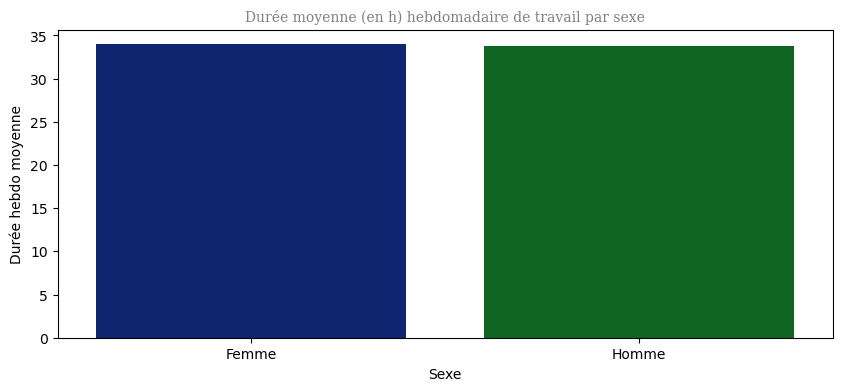

In [179]:
plt.figure(figsize=[10, 4])
sns.barplot("Sexe","Durée hebdo moyenne",data=t)
plt.title("Durée moyenne (en h) hebdomadaire de travail par sexe", fontdict=font)
plt.show()

On remarque que sur ce niveau, il y a une équitée femme homme

#### indicateur 4 - Répartition des employés selon l'anciennté moyenne et le sexe

Text(0.5, 1.0, 'Ancienneté moyenne par sexe')

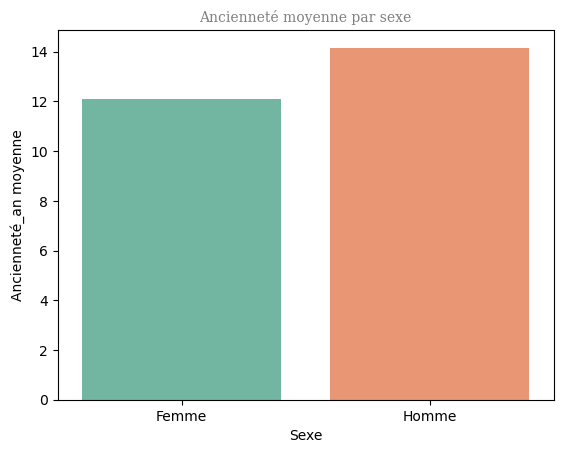

In [180]:
x = 'Sexe'
y = 'Ancienneté_an moyenne'

sns.barplot(data=generate_df_mean(df_final,"Sexe","Ancienneté_an"),x=x,y=y, palette=palette)
plt.title('Ancienneté moyenne par sexe', fontdict=font)

On remarque qu'il y a une légère différence en terme d'ancienneté moyenne et donc ça peut être expliqué par le fait que l'entreprise embauchait plus d'hommes au départ mais par la suite elle a fait en sorte d'équilibrer à l'embauche entre les 2 sexes

#### indicateur 5 - Répartition des salaires par tranche age et par sexe 
Pour cette partie on va considérer les tranches d'âge commençant à 30 et arrivant à 70 (d'après l'analyse ci-dessous)

In [181]:
df_final['age'].min()

31

In [182]:
df_final['age'].max()

68

In [189]:
def generate_tranche_age(x):
    a = int(str(x)[0])
    return '['+str(a)+'0,'+str(a+1)+'0]'

df_final["tranche_age"] = df_final["age"].apply(lambda x:generate_tranche_age(x))

tranche_age
Sexe  tranche_age             
Femme [50,60]               49
      [40,50]               35
      [60,70]               26
      [30,40]               15
Homme [50,60]               49
      [40,50]               40
      [60,70]               27
      [30,40]               15

In [199]:
t=pd.DataFrame(df_final.groupby("Sexe")["tranche_age"].value_counts())
t.columns=["total"]
t.reset_index(inplace=True)


f = t[t["Sexe"]=="Femme"][["tranche_age","total"]]
f.columns=["tranche_age","Femme"]

m = t[t["Sexe"]=="Homme"][["tranche_age","total"]]
m.columns=["tranche_age","Homme"]

t = pd.merge(f,m,on='tranche_age',how='outer')
t["Homme"] = t["Homme"]*-1
t

,tranche_age,Femme,Homme
0,"[50,60]",49,-49
1,"[40,50]",35,-40
2,"[60,70]",26,-27
3,"[30,40]",15,-15


([<matplotlib.axis.XTick at 0x18a792d7788>,
 [Text(-50, 0, '50 prs'),
  Text(-20, 0, '20 prs'),
  Text(0, 0, '0'),
  Text(20, 0, '20 prs'),
  Text(50, 0, '50 prs')])

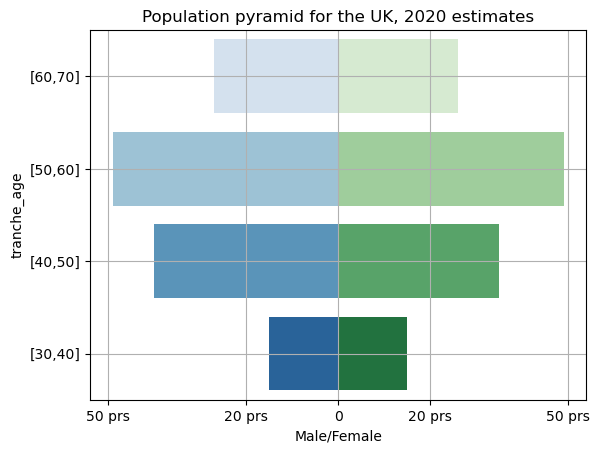

In [205]:
ages = ["[60,70]","[50,60]","[40,50]","[30,40]"]
ax1 = sns.barplot(x='Homme', y='tranche_age', data=t, order=ages, palette="Blues")
ax2 = sns.barplot(x='Femme', y='tranche_age', data=t, order=ages, palette="Greens")

plt.title("Population pyramid for the UK, 2020 estimates")
plt.xlabel("Male/Female")
plt.grid()
plt.xticks(ticks=[-50, -20, 0, 20, 50],
labels=['50 prs', '20 prs', '0', '20 prs', '50 prs'])

Il y a de très légers différences dans le nombre de personnes par tranche d'âge pour les hommes et les femmes.
On peut donc déduire que sur cet indicateur l'entreprise est plutôt conforme.